<a href="https://colab.research.google.com/github/abhiiiinair24/git-github/blob/main/ML_Assignment_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Assignment 1 : Classification and Regression Methods**


### **Part I: Data Analysis & Preprocessing**
#### **Step 1: Preprocessing on Penguin**

**1) Import libraries**

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd


**2)Show head(), shape, dtypes. Analyze the dataset, e.g., return
the main statistics. Provide a brief description (2-3 sentences) of the dataset: What does it represent / key features.**

In [ ]:
df = pd.read_csv('penguins.csv')
copydf = df
print('Penguins Dataset: \n',copydf.head())
print('Penguins Dataset Shape: \n',copydf.shape)
print('Penguins Dataset Type: \n',copydf.dtypes)

#print(df)
'''
Provide a brief description (2-3 sentences) of the dataset: What does it represent / key features.
Ans -> The key features in the dataset includes how we have multiple species(3)
of penguins located on multiple islands. We also have been given mutliple columns where
we are given with numerical values. We also have gender columns to distinguish between the penguins
and the year.
'''

Penguins Dataset: 
   species     island  calorie requirement  average sleep duration  \
0  Adelie  Torgersen                 6563                      11   
1  Adelie  Torgersen                 4890                      14   
2  Adelie  Torgersen                 7184                      11   
3  Adelie  Torgersen                 4169                       8   
4  Adelie  Torgersen                 4774                       8   

   bill_length_mm  bill_depth_mm  flipper_length_mm  body_mass_g  gender  \
0            39.1           18.7              181.0       3750.0    male   
1            39.5           17.4              186.0       3800.0  female   
2            40.3           18.0              195.0       3250.0  female   
3             NaN            NaN                NaN        992.0     NaN   
4            36.7           19.3              193.0       3450.0  female   

     year  
0  2007.0  
1  2007.0  
2  2007.0  
3  2007.0  
4  2007.0  
Penguins Dataset Shape: 
 (344, 10)


'\nProvide a brief description (2-3 sentences) of the dataset: What does it represent / key features.\nAns -> The key features in the dataset includes how we have multiple species(3) \nof penguins located on multiple islands. We also have been given mutliple columns where \nwe are given with numerical values. We also have gender columns to distinguish between the penguins\nand the year.\n'

**3)Return basic statistics using describe(). Return missing counts per column table. Which
columns have missing values or suspicious values?**

In [ ]:
print('Statistics : \n',copydf.describe())

missingCountpercolumnssum = copydf.isnull().sum()
print('Missing column wise value: \n',missingCountpercolumnssum)

#We can see that the number of missing values in the columns are pretty large and hence not very ideal to drop them
#Imputing the values into the dataset with mean/median and mode.

#From the above i can see i have 3 columns with datatype as object
#Iterate over the dataset and change numerical values with mean/median and categorical values with mode().

for colTraverse in copydf.columns:
  if copydf[colTraverse].dtype == 'object':
    copydf[colTraverse].fillna(copydf[colTraverse].mode()[0],inplace=True)
  else:
    copydf[colTraverse].fillna(copydf[colTraverse].mean(),inplace=True)

#print('Updated: \n',df)

missingCountpercolumnssumupdated = copydf.isnull().sum()
print('Cross verifying null values if exists now or not: \n',missingCountpercolumnssumupdated)

Statistics : 
        calorie requirement  average sleep duration  bill_length_mm  \
count           344.000000              344.000000      337.000000   
mean           5270.002907               10.447674       45.494214   
std            1067.959116                2.265895       10.815787   
min            3504.000000                7.000000       32.100000   
25%            4403.000000                9.000000       39.500000   
50%            5106.500000               10.000000       45.100000   
75%            6212.750000               12.000000       49.000000   
max            7197.000000               14.000000      124.300000   

       bill_depth_mm  flipper_length_mm  body_mass_g         year  
count     333.000000         336.000000   339.000000   342.000000  
mean       18.018318         197.764881  4175.463127  2008.035088  
std         9.241384          27.764491   858.713267     0.816938  
min        13.100000          10.000000   882.000000  2007.000000  
25%        15.

/tmp/ipython-input-639187105.py:14: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  copydf[colTraverse].fillna(copydf[colTraverse].mode()[0],inplace=True)
/tmp/ipython-input-639187105.py:16: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, 

Handle mismatched string formats.
For example, in the penguins dataset, the "Species" feature might appear as "Adelie" or
"adelie," both of which refer to the same penguin species. These variations should be
standardized to a consistent format such as "Adelie" or "adelie".

In [ ]:
for colTraverse in copydf.columns:
  if copydf[colTraverse].dtype == 'object':
    copydf[colTraverse] = copydf[colTraverse].astype(str).str.lower().str.strip()

#Converting all the categorical values to small case and removing the extra spaces or anything so that
#it becomes more meaningful and classifies properly.

print ('After Fixing Mismatched String formats: \n',copydf)

After Fixing Mismatched String formats: 
        species     island  calorie requirement  average sleep duration  \
0       adelie  torgersen                 6563                      11   
1       adelie  torgersen                 4890                      14   
2       adelie  torgersen                 7184                      11   
3       adelie  torgersen                 4169                       8   
4       adelie  torgersen                 4774                       8   
..         ...        ...                  ...                     ...   
339  chinstrap      dream                 4826                      11   
340  chinstrap      dream                 4111                       9   
341  chinstrap      dream                 7049                      10   
342  chinstrap      dream                 4705                       7   
343  chinstrap      dream                 6098                       7   

     bill_length_mm  bill_depth_mm  flipper_length_mm  body_mass_g  g

Handle outliers. Detect and manage outliers within the dataset.
For example, in the penguins dataset, while flipper lengths typically fall within the range
of [180 – 210], certain entries might show values like [10-30]. These can be considered
outliers. Possible solutions:
• Remove outliers. If there are just a few outliers, you may eliminate the rows containing
these outliers.
• Impute outliers. Replace the outliers with the mean/median/mode of the feature.

In [ ]:
#print(df.dtypes)

##USed in selecting both int and float values.
numericalVal = copydf.select_dtypes(include=[np.number])

#print(numericalVal)

#APply IQR

Q1 = numericalVal.quantile(0.25)
Q2 = numericalVal.quantile(0.75)
#print('25th percentile: \n',Q1)
#print('75th percentile: \n',Q2)

IQR = Q2-Q1
#print('QR: \n',IQR)

lowerThresshold = (Q1 - 1 * IQR)
upperThresshold = (Q2 + 1 * IQR)

outliers = (numericalVal < lowerThresshold) | (numericalVal > upperThresshold)
#print(outliers.count)

if outliers.any().any():  #To check the entire dataframe , .any() resulted only in columns
    print("Outliers Present.")
else:
    print("No outliers found.")

for colTraverse in numericalVal.columns:
  if outliers[colTraverse].any():
    meanval = copydf[colTraverse].mean()
    copydf.loc[outliers[colTraverse],colTraverse] = meanval

print(copydf)


Outliers Present.
       species     island  calorie requirement  average sleep duration  \
0       adelie  torgersen                 6563                      11   
1       adelie  torgersen                 4890                      14   
2       adelie  torgersen                 7184                      11   
3       adelie  torgersen                 4169                       8   
4       adelie  torgersen                 4774                       8   
..         ...        ...                  ...                     ...   
339  chinstrap      dream                 4826                      11   
340  chinstrap      dream                 4111                       9   
341  chinstrap      dream                 7049                      10   
342  chinstrap      dream                 4705                       7   
343  chinstrap      dream                 6098                       7   

     bill_length_mm  bill_depth_mm  flipper_length_mm  body_mass_g  gender  \
0         39.10

#### **7. Using any data visualization library (e.g. matplotlib, seaborn, plotly), provide at least 5**
visualization graphs related to your dataset. You can utilize any columns or a combination
of columns in your dataset to generate graphs. E.g. correlation matrix, features vs. the
target, counts of categorical features vs. the target.

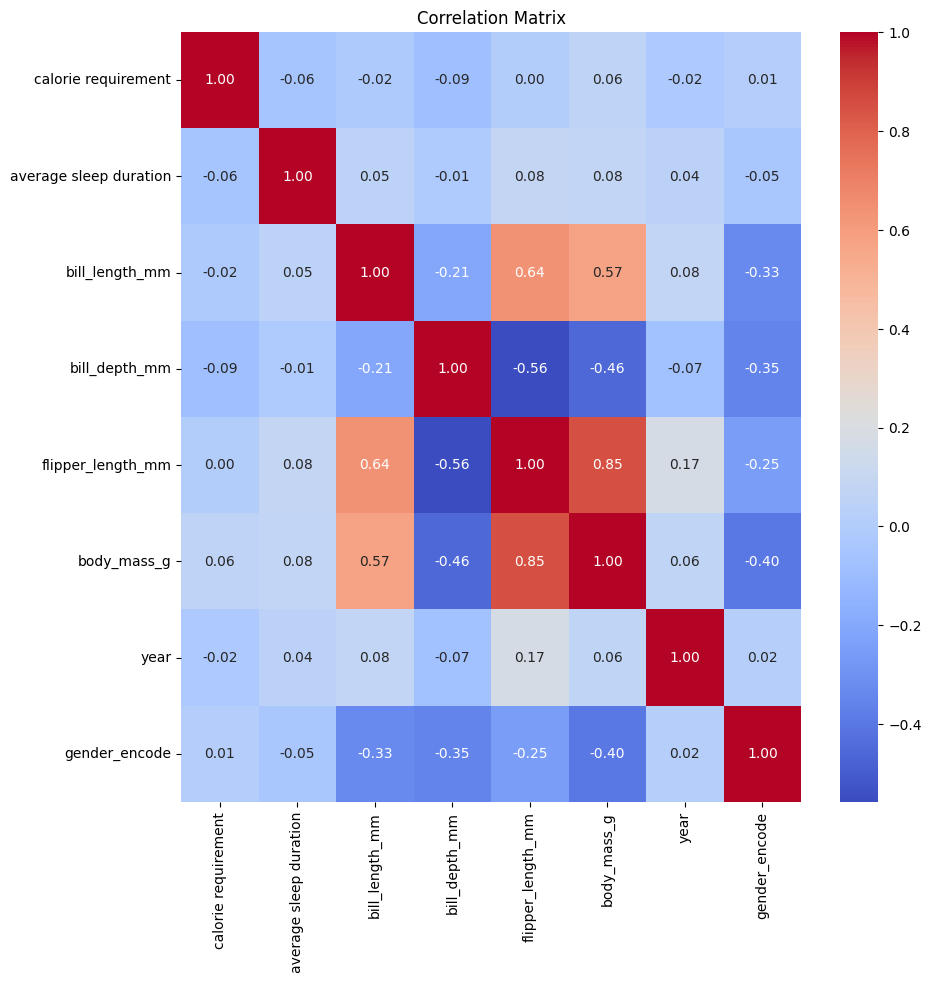

In [ ]:
# 7. Data Visualization
# Used matplotlib.pyplot as plt to plot heatmap

# Selecting columns which in in int of float which can be represented in heatmap
numerical_df = copydf.select_dtypes(include=['int64', 'float64'])

# Ploting Graph
plt.figure(figsize=(10,10))
sns.heatmap(numerical_df.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Matrix")
plt.show()


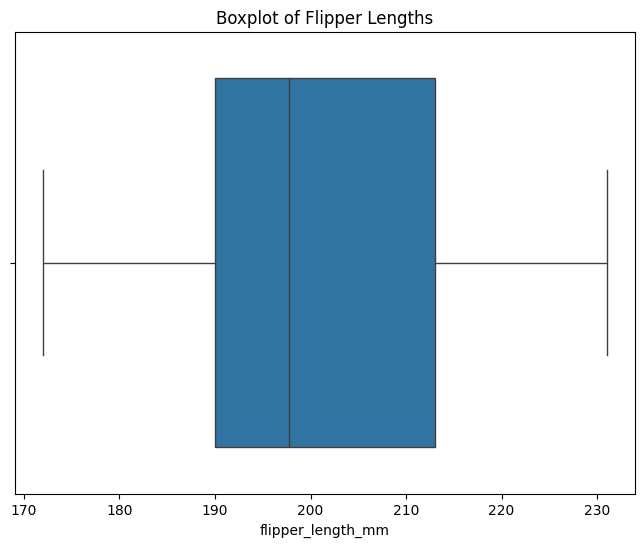

In [ ]:
# Used matplotlib.pyplot as plt to plot boxplot

plt.figure(figsize=(8, 6))
sns.boxplot(x=copydf["flipper_length_mm"])
plt.title("Boxplot of Flipper Lengths")
plt.show()


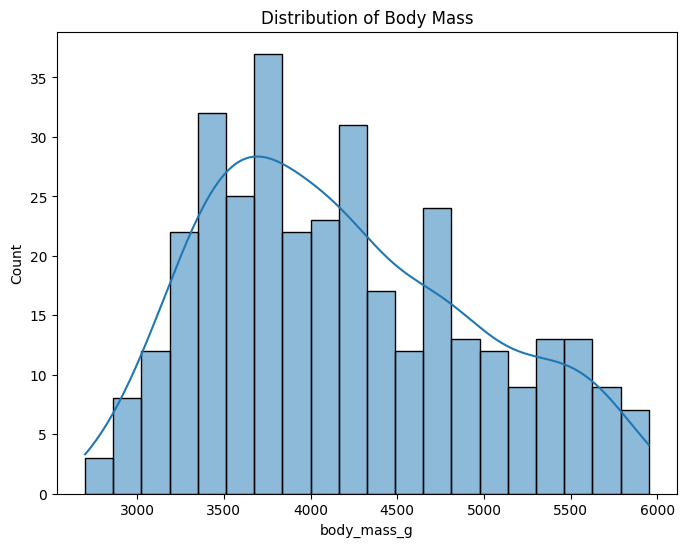

In [ ]:
# Used matplotlib.pyplot as plt to plot histplot

plt.figure(figsize=(8, 6))
# for Line we have used Kernel Density Estimation
sns.histplot(df["body_mass_g"], kde=True, bins=20)
plt.title("Distribution of Body Mass")
plt.show()


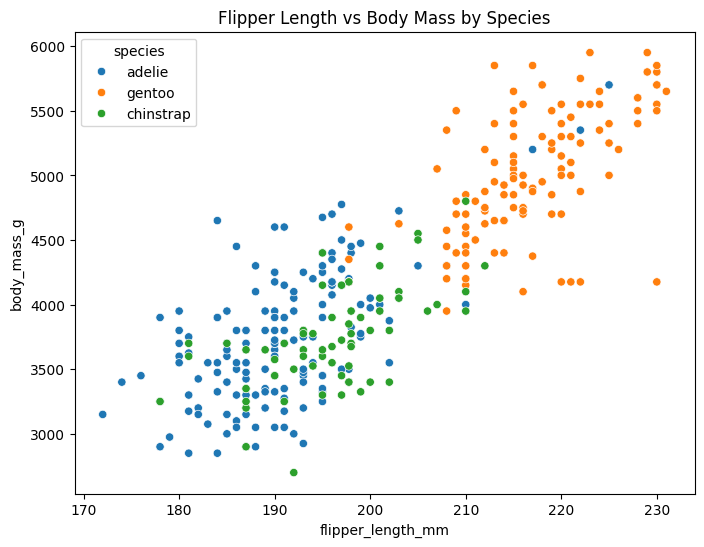

In [ ]:
# Used matplotlib.pyplot as plt to plot histplot

plt.figure(figsize=(8, 6))
sns.scatterplot(x="flipper_length_mm", y="body_mass_g", hue="species", data=copydf)
plt.title("Flipper Length vs Body Mass by Species")
plt.show()


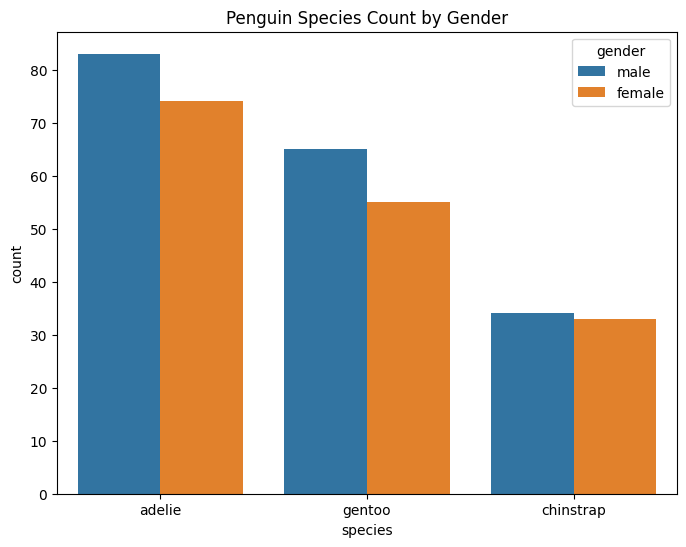

In [ ]:
# Used matplotlib.pyplot as plt to plot countplot

plt.figure(figsize=(8, 6))
sns.countplot(x="species", hue="gender", data=copydf)
plt.title("Penguin Species Count by Gender")
plt.show()


In [ ]:
# 8. Identify uncorrelated or unrelated features

# Used Gender column and created new column with values 0 and 1 which would be helpfull to find correlation in data.
copydf["gender_encode"] = copydf["gender"].map({"male": 0, "female": 1})
numerical_df["gender_encode"] = copydf["gender"].map({"male": 0, "female": 1})

# using corr() to calculate the correlation matrix of a DataFrame.
corr_matrix = numerical_df.corr()
print(corr_matrix["gender_encode"].sort_values(ascending=False))

gender_encode             1.000000
year                      0.016833
calorie requirement       0.013366
average sleep duration   -0.045104
flipper_length_mm        -0.247552
bill_length_mm           -0.328480
bill_depth_mm            -0.352421
body_mass_g              -0.395747
Name: gender_encode, dtype: float64


In [ ]:
# Calculating features with low correlation and removing them/
low_corr_features = corr_matrix["gender_encode"].abs()[corr_matrix["gender_encode"].abs() < 0.05].index
new_df = copydf.drop(columns=low_corr_features)

print("Dropped features:", list(low_corr_features))
new_df.head()

Dropped features: ['calorie requirement', 'average sleep duration', 'year']


,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,gender,gender_encode
0,adelie,torgersen,39.100000,18.700000,181.000000,3750.000000,male,0
1,adelie,torgersen,39.500000,17.400000,186.000000,3800.000000,female,1
2,adelie,torgersen,40.300000,18.000000,195.000000,3250.000000,female,1
3,adelie,torgersen,45.494214,18.018318,197.764881,4175.463127,male,0
4,adelie,torgersen,36.700000,19.300000,193.000000,3450.000000,female,1


In [ ]:
# 9. Convert features with string datatype to categorical
# One-hot encoding
one_hot_encoded_df = pd.get_dummies(new_df, columns=["species", "island"], dtype=int)
one_hot_encoded_df.head()

# for Label encoding we did that on gender above
# df["gender_encode"] = df["gender"].map({"male": 0, "female": 1})
# numerical_df["gender_encode"] = df["gender"].map({"male": 0, "female": 1})
one_hot_encoded_df.drop(columns=["gender"], inplace=True)
one_hot_encoded_df.head()

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,gender_encode,species_adelie,species_chinstrap,species_gentoo,island_biscoe,island_dream,island_torgersen
0,39.100000,18.700000,181.000000,3750.000000,0,1,0,0,0,0,1
1,39.500000,17.400000,186.000000,3800.000000,1,1,0,0,0,0,1
2,40.300000,18.000000,195.000000,3250.000000,1,1,0,0,0,0,1
3,45.494214,18.018318,197.764881,4175.463127,0,1,0,0,0,0,1
4,36.700000,19.300000,193.000000,3450.000000,1,1,0,0,0,0,1


In [ ]:
# 10. Normalize non-categorical features
# Normalizing that features like [bill_depth_mm,flipper_length_mm, body_mass_g]
normalize_df = one_hot_encoded_df.copy()
for col in ["bill_depth_mm","flipper_length_mm", "body_mass_g"]:
    normalize_df[col] = (normalize_df[col] - normalize_df[col].min()) / normalize_df[col].max() - normalize_df[col].min()
normalize_df.head()

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,gender_encode,species_adelie,species_chinstrap,species_gentoo,island_biscoe,island_dream,island_torgersen
0,39.100000,-12.839535,-171.961039,-2699.823529,0,1,0,0,0,0,1
1,39.500000,-12.900000,-171.939394,-2699.815126,1,1,0,0,0,0,1
2,40.300000,-12.872093,-171.900433,-2699.907563,1,1,0,0,0,0,1
3,45.494214,-12.871241,-171.888464,-2699.752023,0,1,0,0,0,0,1
4,36.700000,-12.811628,-171.909091,-2699.873950,1,1,0,0,0,0,1


#### **Step 2: Refactor into a Reusable Preprocessing Method**

#### **1. Create a reusable structure:**
**This can be a class (e.g., PreprocessPipeline) or a clean set of functions.
• Your code should include:
o Handling missing values
o Cleaning string formats
o Outlier detection and treatment
o Encoding categorical variables
o Scaling numeric features**

In [24]:
class PreprocessPipeline:
#Function to import libraries
  def importLibraries(self):
    import numpy as np
    import matplotlib.pyplot as plt
    import seaborn as sns
    import pandas as pd #Runs all the essential libraries needed for the assignment.

#Function to handle missing values
  def handleMissingValues(self,copydf):
    print('Statistics : \n',copydf.describe())

    missingCountpercolumnssum = copydf.isnull().sum()
    print('Missing column wise value: \n',missingCountpercolumnssum)

    #We can see that the number of missing values in the columns are pretty large and hence not very ideal to drop them
    #Imputing the values into the dataset with mean/median and mode.

    #From the above i can see i have 3 columns with datatype as object
    #Iterate over the dataset and change numerical values with mean/median and categorical values with mode().

    for colTraverse in copydf.columns:
      if copydf[colTraverse].dtype == 'object':
        copydf[colTraverse].fillna(copydf[colTraverse].mode()[0],inplace=True)
      else:
        copydf[colTraverse].fillna(copydf[colTraverse].mean(),inplace=True)

    #print('Updated: \n',df)

    missingCountpercolumnssumupdated = copydf.isnull().sum()
    print('Cross verifying null values if exists now or not: \n',missingCountpercolumnssumupdated)
    return copydf

##Function to handle string values
  def handleStringValues(self,df):
    for colTraverse in copydf.columns:
      if copydf[colTraverse].dtype == 'object':
        copydf[colTraverse] = copydf[colTraverse].astype(str).str.lower().str.strip()

      #Converting all the categorical values to small case and removing the extra spaces or anything so that
      #it becomes more meaningful and classifies properly.

    print ('After Fixing Mismatched String formats: \n',copydf)
    return copydf

#Function to handle outliers
  def handleOutliers(self,df):
    #print(df.dtypes)

    ##USed in selecting both int and float values.
    numericalVal = copydf.select_dtypes(include=[np.number])

    #print(numericalVal)

    #APply IQR

    Q1 = numericalVal.quantile(0.25)
    Q2 = numericalVal.quantile(0.75)
    #print('25th percentile: \n',Q1)
    #print('75th percentile: \n',Q2)

    IQR = Q2-Q1
    #print('QR: \n',IQR)

    lowerThresshold = (Q1 - 1 * IQR)
    upperThresshold = (Q2 + 1 * IQR)

    outliers = (numericalVal < lowerThresshold) | (numericalVal > upperThresshold)
    #print(outliers.count)

    if outliers.any().any():  #To check the entire dataframe , .any() resulted only in columns
      print("Outliers Present.")
    else:
      print("No outliers found.")

    for colTraverse in numericalVal.columns:
      if outliers[colTraverse].any():
        meanval = copydf[colTraverse].mean()
        copydf.loc[outliers[colTraverse],colTraverse] = meanval

    return copydf

#Function to handle Hotencoding values
  def funcHotEncoding(self, df):
    one_hot_encoded_df = pd.get_dummies(new_df, columns=["species", "island"], dtype=int)

    one_hot_encoded_df.drop(columns=["gender"], inplace=True)

    one_hot_encoded_df.head()

    return df

#Function to normalise numerical values
  def scalingValues(self,df):
    normalize_df = one_hot_encoded_df.copy()

    for col in ["bill_depth_mm","flipper_length_mm", "body_mass_g"]:
      normalize_df[col] = (normalize_df[col] - normalize_df[col].min()) / normalize_df[col].max() - normalize_df[col].min()

    normalize_df.head()

    return df

  def fit_transform(self,df):
    copydf = df #backup of the original document
    self.importLibraries
    df = self.handleMissingValues(df)
    df = self.handleStringValues(df)
    df = self.handleOutliers(df)
    df = self.funcHotEncoding(df)
    df = self.scalingValues(df)
    return df

# Sample usage
df = pd.read_csv("penguins.csv")  # or any dataset

pipeline = PreprocessPipeline()
processed_df = pipeline.fit_transform(df)

print(processed_df.head())



Statistics : 
        calorie requirement  average sleep duration  bill_length_mm  \
count           344.000000              344.000000      337.000000   
mean           5270.002907               10.447674       45.494214   
std            1067.959116                2.265895       10.815787   
min            3504.000000                7.000000       32.100000   
25%            4403.000000                9.000000       39.500000   
50%            5106.500000               10.000000       45.100000   
75%            6212.750000               12.000000       49.000000   
max            7197.000000               14.000000      124.300000   

       bill_depth_mm  flipper_length_mm  body_mass_g         year  
count     333.000000         336.000000   339.000000   342.000000  
mean       18.018318         197.764881  4175.463127  2008.035088  
std         9.241384          27.764491   858.713267     0.816938  
min        13.100000          10.000000   882.000000  2007.000000  
25%        15.

/tmp/ipython-input-171408033.py:24: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  copydf[colTraverse].fillna(copydf[colTraverse].mode()[0],inplace=True)
/tmp/ipython-input-171408033.py:26: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, 